In [1]:
import pandas as pd
import numpy as np
import glob
import glob
import matplotlib.pyplot as plt
import re
from IPython.display import display, Markdown

In [2]:
NUM_MAPS = 5
SIZE = 29
PATH = f'./min*_{SIZE}x{SIZE}/plots_with*/'
ACTION_TYPE = 'minm_eig_value'
NUM_RECONSTRUCTION = len(glob.glob(PATH))
NUM_ACTION_STRATS = 2
print(NUM_RECONSTRUCTION)

19


In [3]:
def read_file(folder):
    data = [pd.read_csv(file) for file in sorted(glob.glob(folder + '*.csv'))]
    return data

def multi_plot(num_maps = NUM_MAPS, type = 'Gauss'):
    num_types = [path for path in glob.glob(PATH) if re.search(f'{type}', path)]
    types_of_lambda = [' Lambda and Sparsity Prior',' Lambda and Zero Prior',' Sparsity Prior',' Zero Prior']
    
    fig, ax = plt.subplots(1, 4, figsize=(24, 6))
    
    for type_num in range(len(num_types)):
        array = read_file(num_types[type_num])
        psnr_array, mse_array, ssim_array, rank_array = [], [], [], []
        for i in range(num_maps):
            psnr_array.append(array[i].psnr_value)
            mse_array.append(array[i].mse_value)
            ssim_array.append(array[i].ssim_value)
            rank_array.append(array[i]['rank'])
            
        psnr_array = np.array(psnr_array)
        mse_array = np.array(mse_array)
        ssim_array = np.array(ssim_array)
        rank_array = np.array(rank_array)
        
        mean_psnr = np.mean(psnr_array, axis=0)
        mean_mse = np.mean(mse_array, axis=0)
        mean_ssim = np.mean(ssim_array, axis=0)
        mean_rank = np.mean(rank_array, axis=0)
        
        std_psnr = np.std(psnr_array, axis=0)
        std_mse = np.std(mse_array, axis=0)
        std_ssim = np.std(ssim_array, axis=0)
        std_rank = np.std(rank_array, axis=0)

        ax[0].plot(mean_psnr, label=type + types_of_lambda[type_num])
        ax[0].fill_between(range(len(mean_psnr)),mean_psnr-std_psnr,mean_psnr+std_psnr, alpha=0.2)
        ax[0].set_ylabel('PSNR Value')
        ax[0].set_xlabel('Steps')
        ax[0].grid()
        ax[0].legend()

        ax[1].plot(mean_mse, label=type + types_of_lambda[type_num])
        ax[1].fill_between(range(len(mean_mse)),mean_mse-std_mse,mean_mse+std_mse, alpha=0.2)
        ax[1].set_ylabel('MSE Value')
        ax[1].set_xlabel('Steps')
        ax[1].grid()
        ax[1].legend()
        
        ax[2].plot(mean_ssim, label=type + types_of_lambda[type_num])
        ax[2].fill_between(range(len(mean_ssim)),mean_ssim-std_ssim,mean_ssim+std_ssim, alpha=0.2)
        ax[2].set_ylabel('SSIM Value')
        ax[2].set_xlabel('Steps')
        ax[2].grid()
        ax[2].legend()
        
        ax[3].plot(mean_rank, label=type + types_of_lambda[type_num])
        ax[3].fill_between(range(len(mean_rank)),mean_rank-std_rank,mean_rank+std_rank, alpha=0.2)
        ax[3].set_ylabel('Rank Value')
        ax[3].set_xlabel('Steps')
        ax[3].grid()
        ax[3].legend()

    plt.tight_layout()
    # plt.show()
    

## Gauss Regularization of Size 29x29

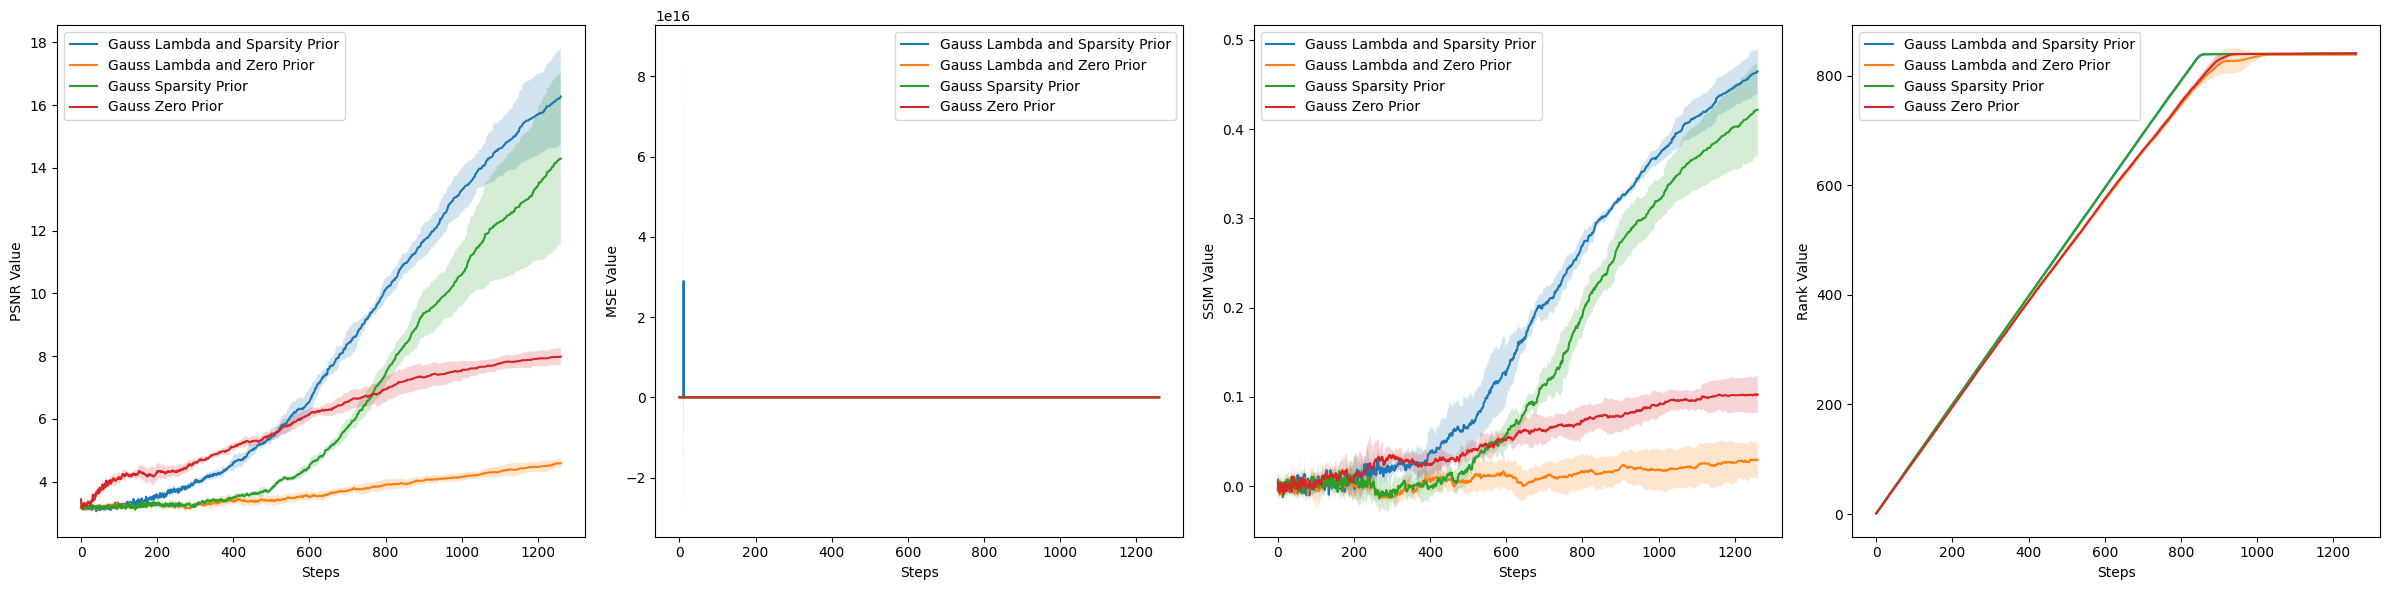

## LOG Regularization of Size 29x29

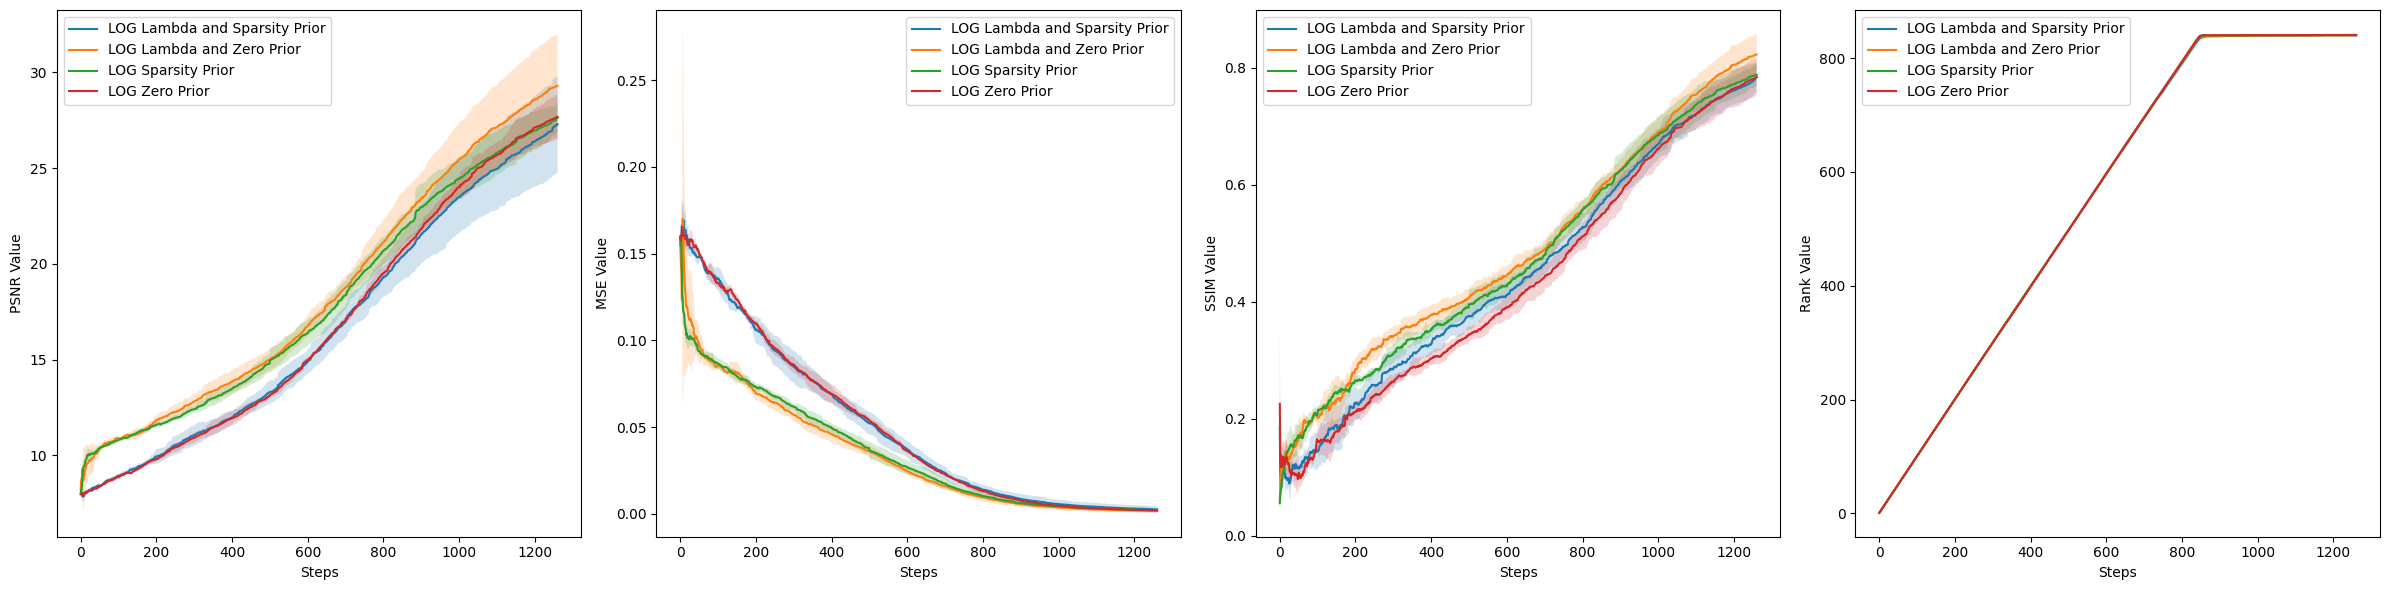

## Sharpen Regularization of Size 29x29

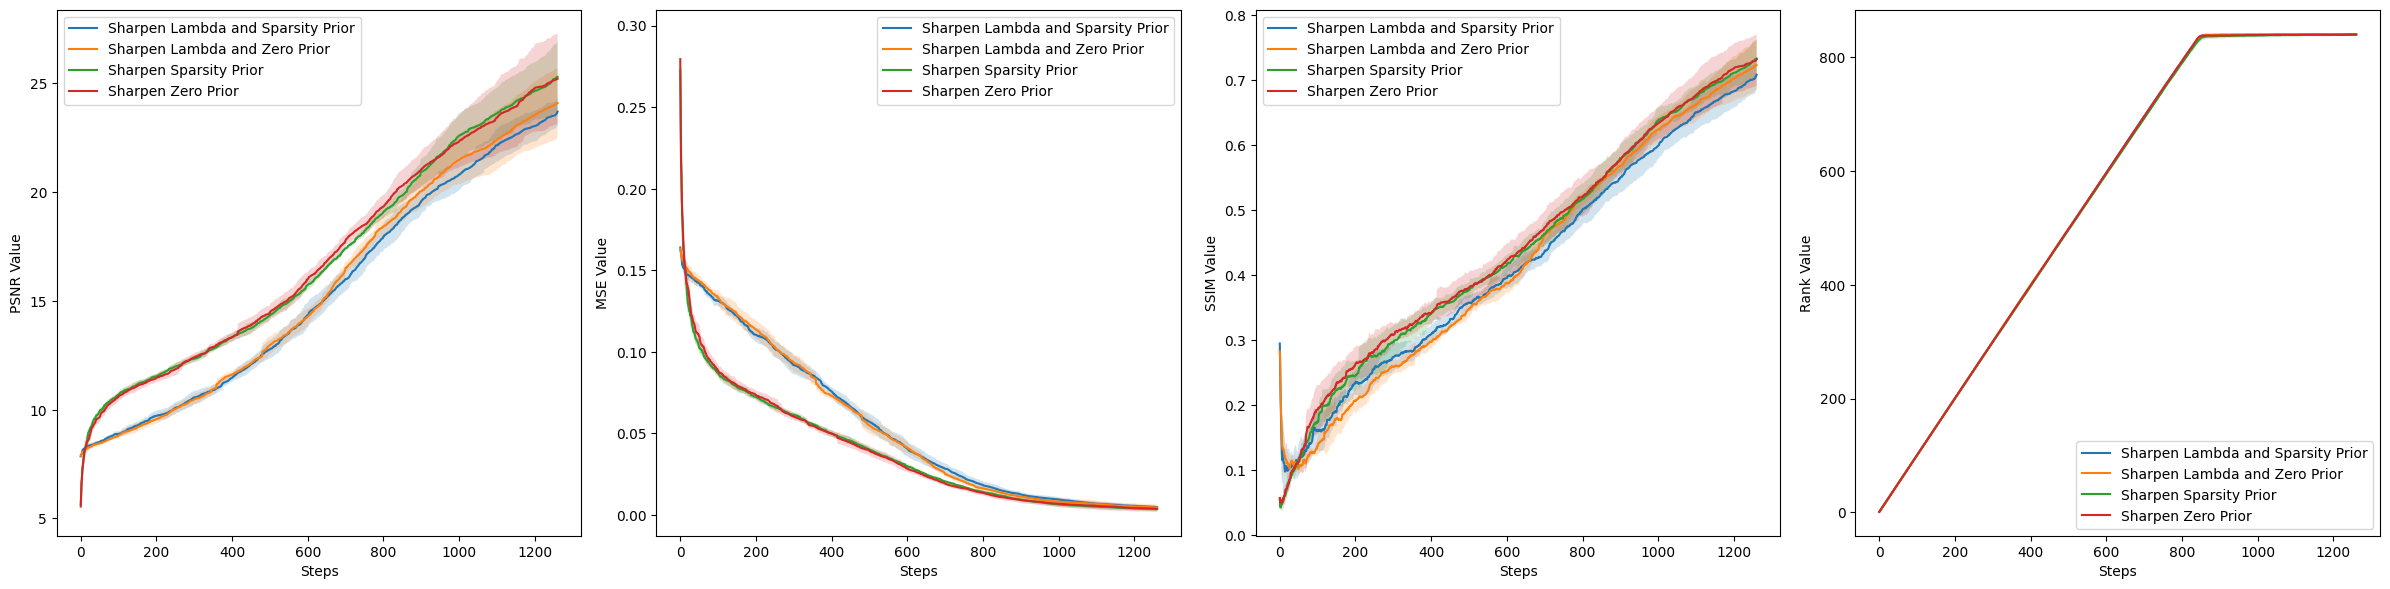

## tikhonov Regularization of Size 29x29

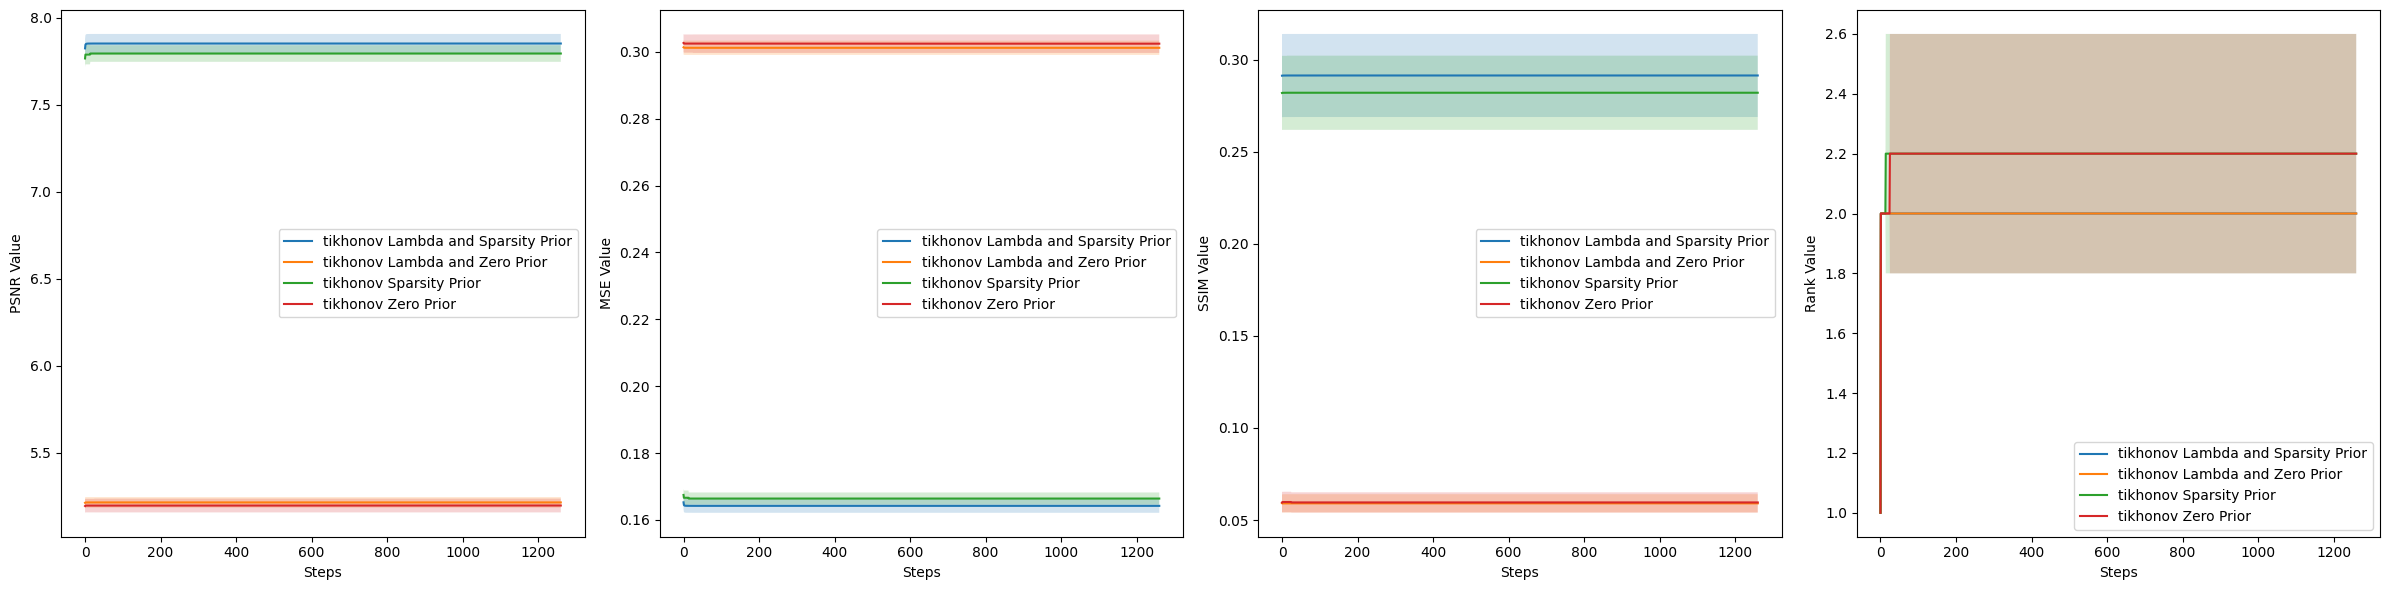

## without Regularization of Size 29x29

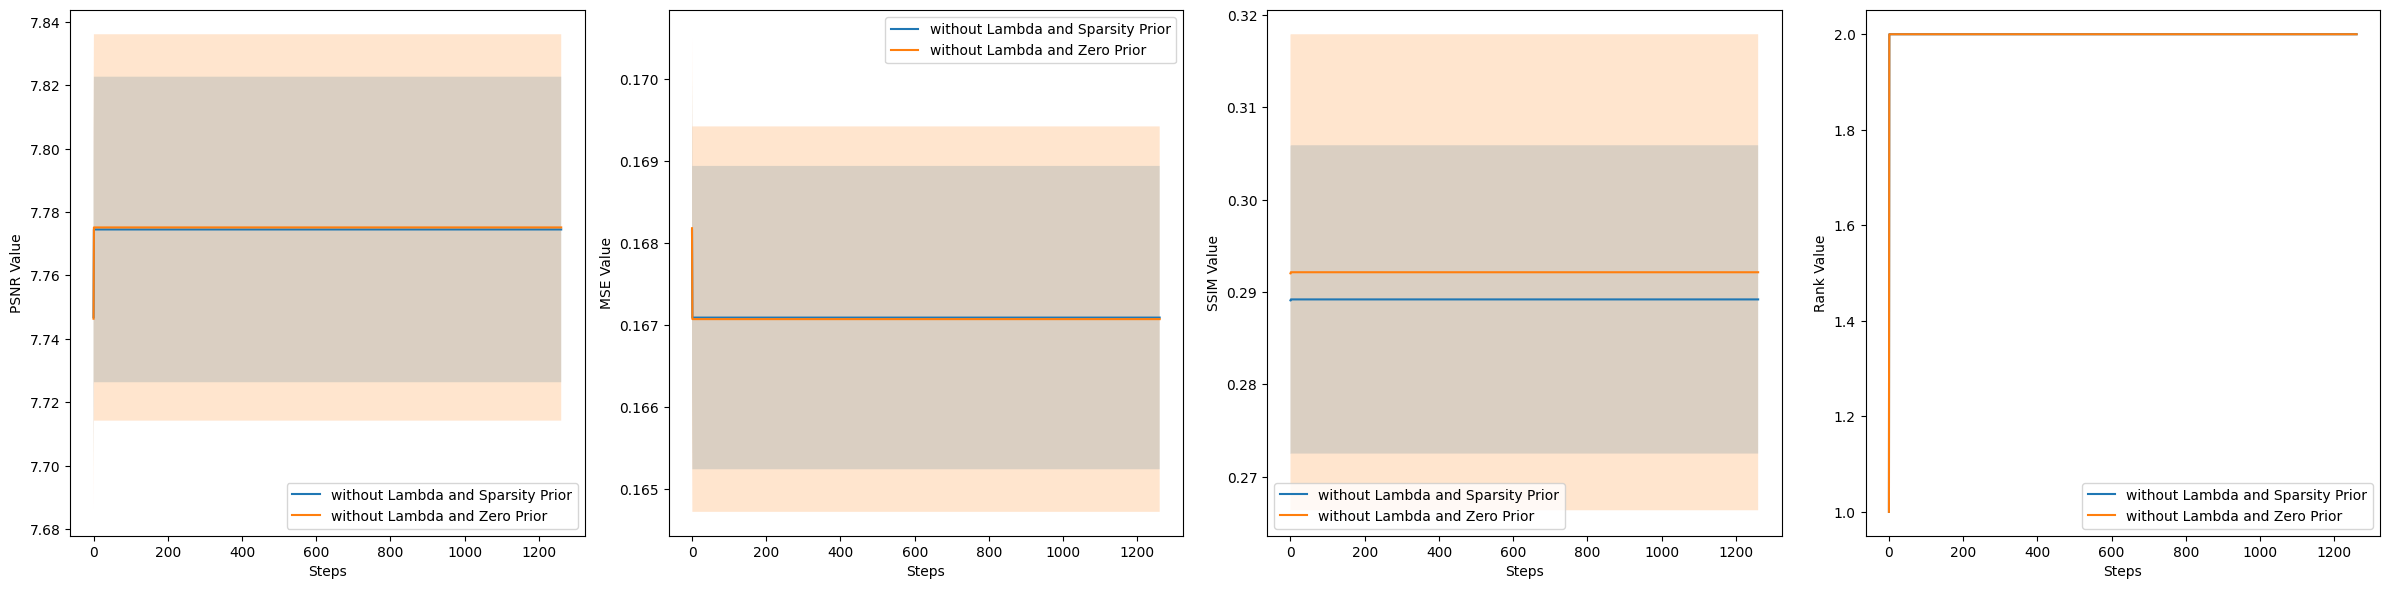

## Laplacian Regularization of Size 29x29

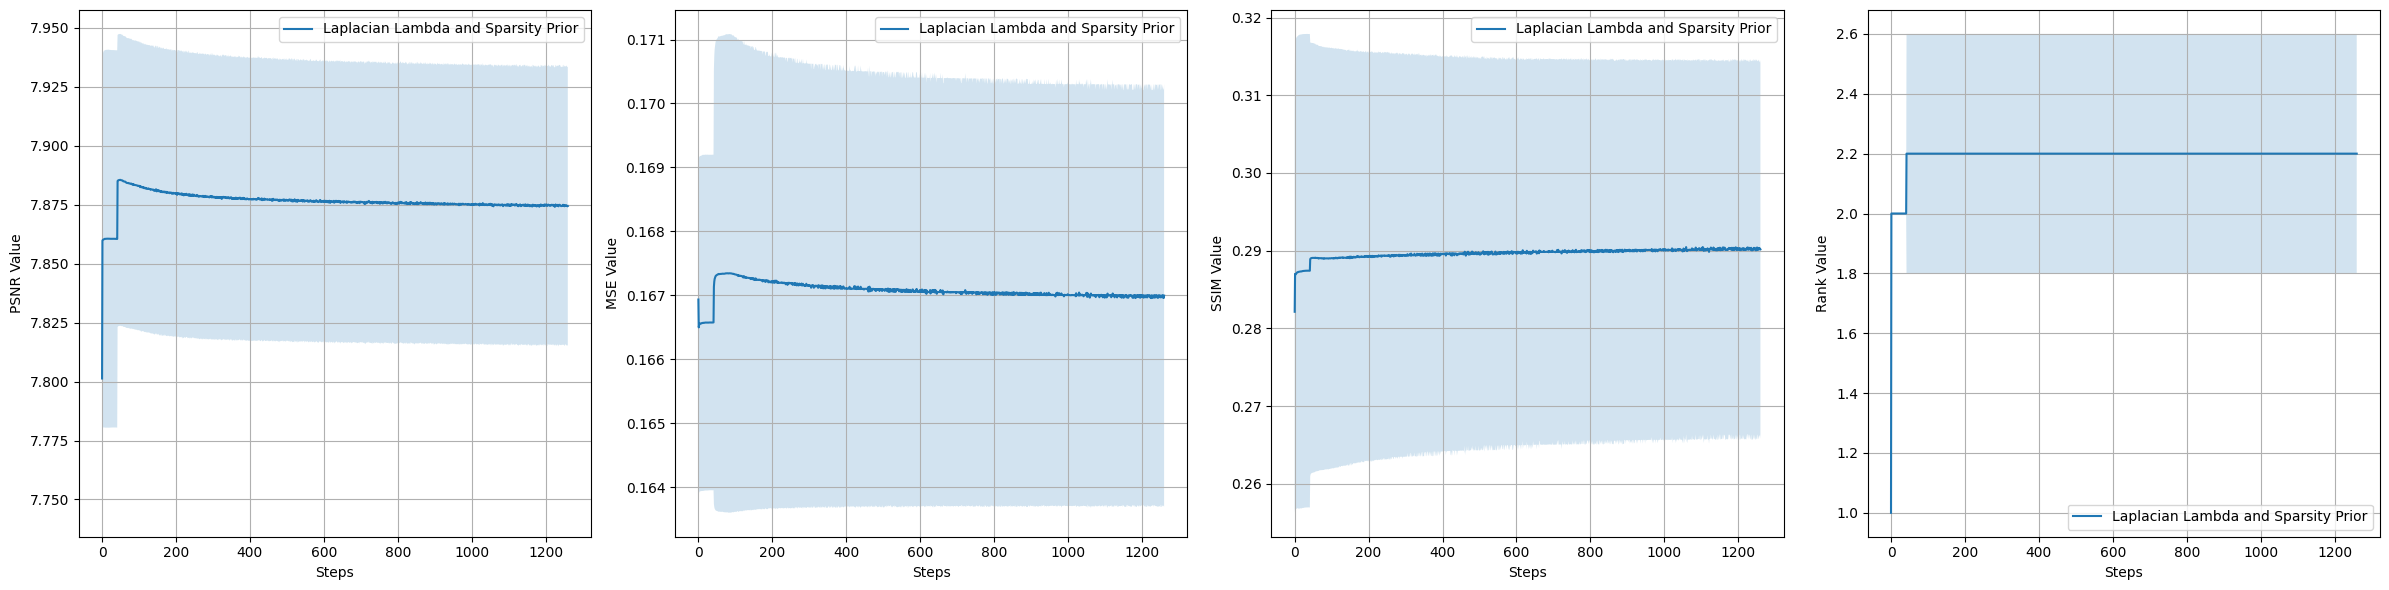

In [4]:

for i in ['Gauss', 'LOG', 'Sharpen', 'tikhonov', 'without', 'Laplacian']:
    display(Markdown(f'## {i} Regularization of Size {SIZE}x{SIZE}'))
    multi_plot(num_maps = NUM_MAPS, type = i)
    plt.savefig(f'plots/{i}Regularization_{ACTION_TYPE}_{SIZE}x{SIZE}.png')
    plt.show()


In [5]:
# reconstructions_without = [
#         'without_regularization_and_zero_prior', 'without_regularization_and_sparsity_prior']
# reconstructions_tikhonov = ['with_tikhonov_and_identity_and_zero_prior', 'with_tikhonov_and_identity_and_sparsity_prior',
#                             'with_tikhonov_and_lambda_zero_prior', 'with_tikhonov_and_lambda_sparsity_prior']
# reconstructions_sharpen = ['with_Sharpen_regularization_and_zero_prior', 'with_Sharpen_regularization_and_sparsity_prior',
#                             'with_Sharpen_regularization_and_lambda_zero_prior', 'with_Sharpen_regularization_and_lambda_sparsity_prior']
# reconstructions_LOGian = ['with_LOG_regularization_and_zero_prior', 'with_LOG_regularization_and_sparsity_prior',
#                             'with_LOG_regularization_and_lambda_zero_prior', 'with_LOG_regularization_and_lambda_sparsity_prior']
# reconstructions_gassian = ['with_Gauss_regularization_and_zero_prior', 'with_Gauss_regularization_and_sparsity_prior',
#                             'with_Gauss_regularization_and_lambda_zero_prior', 'with_Gauss_regularization_and_lambda_sparsity_prior']
# reconstructions_laplacian = ['with_Laplacian_regularization']
# reconstruction_nnls = ['with_non_negative_least_square']

# strategies = reconstructions_without + reconstructions_tikhonov + reconstructions_sharpen + \
#     reconstructions_LOGian + reconstructions_gassian + \
#     reconstructions_laplacian #+ reconstruction_nnls
    
# strategies.sort()
# files = sorted(glob.glob(f'./min*_{SIZE}x{SIZE}/plots_with*/*.csv'))

# print(len(files),len(strategies))


In [6]:
# def multi_plot(current_files,strategies,num_reconstruction,num_maps):
#     # files = sorted(glob.glob('./random_{SIZE}x{SIZE}/plots_with*/*.csv'))
#     dfs = [[pd.read_csv(current_files[Map + rec*num_maps]) for Map in range(num_maps)]
#         for rec in range(num_reconstruction)]

#     fig, ax = plt.subplots(1, 4, figsize=(24, 6))
    
#     for Map in range(num_maps):
#         psnr_array = []
#         mse_array = []
#         ssim_array = []
#         rank_array = []

#         for rec in range(num_reconstruction):
#             psnr_array.append(dfs[rec][Map]['psnr_value'])
#             mse_array.append(dfs[rec][Map]['mse_value'])
#             ssim_array.append(dfs[rec][Map]['ssim_value'])
#             rank_array.append(dfs[rec][Map]['rank'])
        
#         psnr_array = np.array(psnr_array)
#         mse_array = np.array(mse_array)
#         ssim_array = np.array(ssim_array)
#         rank_array = np.array(rank_array)
        
#         mean_psnr = np.mean(psnr_array, axis=0)
#         mean_mse = np.mean(mse_array, axis=0)
#         mean_ssim = np.mean(ssim_array, axis=0)
#         mean_rank = np.mean(rank_array, axis=0)
        
#         std_psnr = np.std(psnr_array, axis=0)
#         std_mse = np.std(mse_array, axis=0)
#         std_ssim = np.std(ssim_array, axis=0)
#         std_rank = np.std(rank_array, axis=0)
        

#         ax[0].plot(mean_psnr, label=f'map {Map+1} psnr')
#         ax[0].fill_between(range(len(mean_psnr)),mean_psnr-std_psnr,mean_psnr+std_psnr, alpha=0.2)
#         ax[0].set_ylabel('PSNR Value')
#         ax[0].set_xlabel('Steps')
#         ax[0].grid()
#         ax[0].legend()

#         ax[1].plot(mean_mse, label=f'map {Map+1} mse')    
#         ax[1].fill_between(range(len(mean_mse)),mean_mse-std_mse,mean_mse+std_mse, alpha=0.2)
#         ax[1].set_ylabel('MSE Value')
#         ax[1].set_xlabel('Steps')
#         ax[1].grid()
#         ax[1].legend()

#         ax[2].plot(mean_ssim, label=f'map {Map+1} ssim')
#         ax[2].fill_between(range(len(mean_ssim)),mean_ssim-std_ssim,mean_ssim+std_ssim, alpha=0.2)
#         ax[2].set_ylabel('SSIM Value')
#         ax[2].set_xlabel('Steps')
#         ax[2].grid()
#         ax[2].legend()
        
#         ax[3].plot(mean_rank, label=f'map {Map+1} rank')
#         ax[3].fill_between(range(len(mean_rank)),mean_rank-std_rank,mean_rank+std_rank, alpha=0.2)
#         ax[3].set_ylabel('Rank Value')
#         ax[3].set_xlabel('Steps')
#         ax[3].grid()
#         ax[3].legend()

# plt.show()

# Without any regularization

In [7]:
# type_of = sorted(reconstructions_without)
# type_files = []
# for type_ in type_of:
#     type_files += sorted(glob.glob(f'./min*_{SIZE}x{SIZE}/*{type_}*/*.csv'))
# type_num_reconstruction = len(type_files) // NUM_MAPS
# type_files.sort()
# print(type_files,type_num_reconstruction)
# multi_plot(type_files,type_of,type_num_reconstruction,NUM_MAPS)
# plt.tight_layout()
# plt.savefig(f'plots/WithoutAnyRegularization_{ACTION_TYPE}_{SIZE}x{SIZE}.png')

# Tikhonov Regularization

In [8]:
# type_of = sorted(reconstructions_tikhonov)
# type_files = []
# for type_ in type_of:
#     type_files += sorted(glob.glob(f'./min*_{SIZE}x{SIZE}/*{type_}*/*.csv'))
# type_num_reconstruction = len(type_files) // NUM_MAPS
# type_files.sort()

# multi_plot(type_files,type_of,type_num_reconstruction,NUM_MAPS)
# plt.tight_layout()
# plt.savefig(f'plots/TikhonovRegularization_{ACTION_TYPE}_{SIZE}x{SIZE}.png')

# Gauss Regularization

In [9]:
# type_of = sorted(reconstructions_gassian)
# type_files = []
# for type_ in type_of:
#     type_files += sorted(glob.glob(f'./min*_{SIZE}x{SIZE}/*{type_}*/*.csv'))
# type_num_reconstruction = len(type_files) // NUM_MAPS
# type_files.sort()

# multi_plot(type_files,type_of,type_num_reconstruction,NUM_MAPS)
# plt.tight_layout()
# plt.savefig(f'plots/GaussRegularization_{ACTION_TYPE}_{SIZE}x{SIZE}.png')

# LOG regularisation

In [10]:
# type_of = sorted(reconstructions_LOGian)
# type_files = []
# for type_ in type_of:
#     type_files += sorted(glob.glob(f'./min*_{SIZE}x{SIZE}/*{type_}*/*.csv'))
# type_num_reconstruction = len(type_files) // NUM_MAPS
# type_files.sort()

# multi_plot(type_files,type_of,type_num_reconstruction,NUM_MAPS)
# plt.tight_layout()
# plt.savefig(f'plots/LOGRegularization_{ACTION_TYPE}_{SIZE}x{SIZE}.png')

# Laplacian Regularisation

In [11]:
# type_of = sorted(reconstructions_laplacian)
# type_files = []
# for type_ in type_of:
#     type_files += sorted(glob.glob(f'./min*_{SIZE}x{SIZE}/*{type_}*/*.csv'))
# type_num_reconstruction = len(type_files) // NUM_MAPS
# type_files.sort()

# multi_plot(type_files,type_of,type_num_reconstruction,NUM_MAPS)
# plt.tight_layout()
# plt.savefig(f'plots/LaplacianRegularization_{ACTION_TYPE}_{SIZE}x{SIZE}.png')

# Sharpen Kernel

In [12]:
# type_of = sorted(reconstructions_sharpen)
# type_files = []
# for type_ in type_of:
#     type_files += sorted(glob.glob(f'./min*_{SIZE}x{SIZE}/*{type_}*/*.csv'))
# type_num_reconstruction = len(type_files) // NUM_MAPS
# type_files.sort()

# multi_plot(type_files,type_of,type_num_reconstruction,NUM_MAPS)
# plt.tight_layout()
# plt.savefig(f'plots/SharpenRegularization_{ACTION_TYPE}_{SIZE}x{SIZE}.png')